# Pitch & Roll data analysis

In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [4]:
N_EPISODES = 540
FRAMES_PER_EPISODE = 400

### Finds highest absolute pitch & roll for all episodes and all labels

In [5]:
highest_p = 0
highest_r = 0
labels = [0,1,2,5,10,15,20,25,30]
for episodeNr in range(1,541):
    for labelNr in labels:
        try:
            # Opening JSON file
            f = open('../3dmodel/test_4_episode_'+str(episodeNr)+'/labels_'+str(labelNr)+'.json')
            
            # returns JSON object as a dictionary
            data = json.load(f)
            
            # Iterating through the json list
            for i in data:
                p = abs(data[i][0])
                r = abs(data[i][1])
                if(p>highest_p):
                    highest_p = p
                if(r>highest_r):
                    highest_r = r

            # Closing file
            f.close()
        except:
            continue
print(highest_p, highest_r) 

61.3279475386535 62.21733379123754


### Extract one dataframe per label from all episodes

In [6]:
# load all data
labels = [0,1,2,5,10,15,20,25,30]
dataframes = []
for label in tqdm(labels):
    episodes = []
    for ep in range(1, N_EPISODES+1):
        filename = "../3dmodel/test_4_episode_"+ str(ep) +"/labels_"+ str(label) +".json"
        try:
            data = json.load(open(filename))
            
            for point in data:
                episodes.append(data[point]+[ep, point])

        except Exception as e:
            continue

    p_r_df = pd.DataFrame(episodes)
    p_r_df.rename(columns = {0:'pitch', 1:'roll', 2:'episode', 3:'position_within_episode'}, inplace=True)
    p_r_df = p_r_df.astype({"pitch": float, "roll": float})
    dataframes.append(p_r_df)

dataframe_dict = dict(zip(labels, dataframes))

  0%|          | 0/9 [00:00<?, ?it/s]

In [7]:
dataframe_dict.get(0).head()

,pitch,roll,episode,position_within_episode
0,15.915869,2.358416,1,0
1,14.295925,1.700391,1,1
2,6.213590,1.611325,1,2
3,1.235337,6.175461,1,3
4,1.341678,3.695468,1,4


In [8]:
all_pitch = pd.DataFrame()
all_roll = pd.DataFrame()
for key in dataframe_dict.keys():
    df = dataframe_dict.get(key)
    pitch = "pitch_"+str(key)
    roll = "roll_"+str(key)
    all_pitch[pitch] = df["pitch"]
    all_roll[roll] = df["roll"]

describe1 = all_pitch.describe()
describe2 = all_roll.describe()

In [9]:
describe1

,pitch_0,pitch_1,pitch_2,pitch_5,pitch_10,pitch_15,pitch_20,pitch_25,pitch_30
count,216000.000000,128309.000000,127663.000000,125725.000000,122495.000000,119265.000000,116035.000000,112805.000000,109575.000000
mean,0.067844,-0.084864,-0.107256,-0.100462,-0.090511,-0.099893,-0.105084,-0.095389,-0.107801
std,6.611220,6.642388,6.626167,6.567844,6.531722,6.510263,6.496964,6.470887,6.465280
min,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279,-53.721279
25%,-2.760713,-3.234515,-3.241131,-3.230083,-3.207179,-3.196336,-3.194786,-3.167921,-3.163679
50%,0.026246,-0.055638,-0.065767,-0.069439,-0.063333,-0.075394,-0.092013,-0.072208,-0.060108
75%,2.876398,3.109895,3.084898,3.063062,3.041653,3.020865,3.010117,3.016302,2.998242
max,61.327948,61.327948,61.327948,61.327948,61.327948,61.327948,61.327948,61.327948,61.327948


In [10]:
describe2

,roll_0,roll_1,roll_2,roll_5,roll_10,roll_15,roll_20,roll_25,roll_30
count,216000.000000,128309.000000,127663.000000,125725.000000,122495.000000,119265.000000,116035.000000,112805.000000,109575.000000
mean,0.302944,0.250125,0.253208,0.256671,0.264241,0.263540,0.267740,0.277121,0.278316
std,7.021762,6.831039,6.841609,6.875649,6.924513,6.979096,7.017278,7.063515,7.100044
min,-58.846396,-53.181349,-53.181349,-53.181349,-53.181349,-53.181349,-53.181349,-53.181349,-53.181349
25%,-2.572059,-2.932393,-2.939085,-2.971420,-2.996049,-3.034725,-3.050122,-3.082875,-3.093130
50%,0.229709,0.209078,0.210038,0.200926,0.211926,0.212025,0.215539,0.215596,0.215847
75%,3.187162,3.397185,3.406982,3.437116,3.477812,3.504470,3.525151,3.567211,3.570848
max,62.217334,62.217334,62.217334,62.217334,62.217334,62.217334,62.217334,62.217334,62.217334


In [11]:
# only label 0 contains 400 elements per episode totalling 216.000 in total
label0_df = dataframe_dict.get(0)
label0_df.head()

,pitch,roll,episode,position_within_episode
0,15.915869,2.358416,1,0
1,14.295925,1.700391,1,1
2,6.213590,1.611325,1,2
3,1.235337,6.175461,1,3
4,1.341678,3.695468,1,4


### Check for NaN values

In [12]:
# check table for NaN
label0_df.isnull().values.any()

False

In [13]:
label0_df.dtypes

pitch                      float64
roll                       float64
episode                      int64
position_within_episode     object
dtype: object

### Distributions of pitch and roll

TypeError: 'tuple' object is not callable

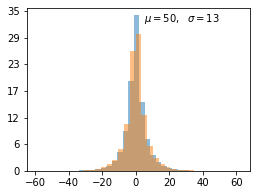

In [101]:
yticks = np.linspace(0, 75000, 7)

plt.figure(figsize=(4,3))

plt.hist(label0_df.pitch, bins = 35, alpha=0.5, label='pitch')
plt.hist(label0_df.roll, bins = 35, alpha=0.5, label='roll')
plt.yticks(yticks, labels=[round(v/2160) for v in yticks])
plt.text(5, 70000, r'$\mu = 0, \ \ \sigma = 7$')
plt.xlim(-50, 50)
plt.xlabel("angle (°)")
plt.ylabel("density (%)")
plt.legend()
plt.show()

### Distributions of normalized pitch and roll

In [15]:
# Function to normalize pitch and roll angles
def norm_pr(x, min = -90.0, max = 90.0):
    return ((x - min) * 2) / (max - min) - 1

# Function to normalize pitch and roll angles
def denorm_pr(x, min = -90.0, max = 90.0):
    return ((x + 1) * (max - min))/2 + min

In [16]:
label0_df["pitch_norm"] = label0_df["pitch"].apply(lambda x : norm_pr(x))
label0_df["roll_norm"] = label0_df["roll"].apply(lambda x : norm_pr(x))
label0_df.head()

,pitch,roll,episode,position_within_episode,pitch_norm,roll_norm
0,15.915869,2.358416,1,0,0.176843,0.026205
1,14.295925,1.700391,1,1,0.158844,0.018893
2,6.213590,1.611325,1,2,0.069040,0.017904
3,1.235337,6.175461,1,3,0.013726,0.068616
4,1.341678,3.695468,1,4,0.014908,0.041061


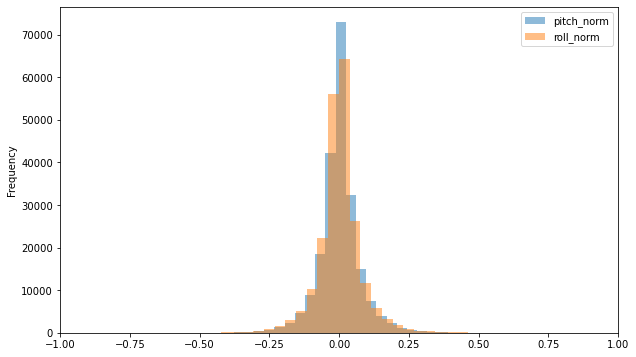

In [17]:
label0_df = dataframe_dict.get(0)
pitch = label0_df.pitch_norm.plot.hist(bins = 35, figsize=(10, 6), xlim=[-1,1], alpha=0.5, legend=True)
roll = label0_df.roll_norm.plot.hist(bins = 35, figsize=(10, 6), xlim=[-1,1], alpha=0.5, legend=True)

### Correlation

<AxesSubplot:>

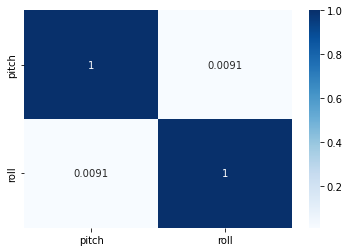

In [18]:
corr = label0_df[["pitch", "roll"]].corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### Graphs of pitch and roll from first episode

<AxesSubplot:title={'center':'Pitch trend in the first episode'}, xlabel='frames', ylabel='pitch (°)'>

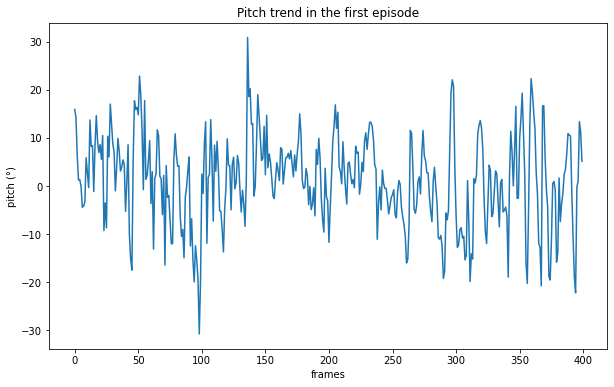

In [19]:
label0_df.iloc[0:400]["pitch"].plot(figsize=(10, 6), ylabel="pitch (°)", xlabel="frames", title="Pitch trend in the first episode")

<AxesSubplot:title={'center':'Roll trend in the first episode'}, xlabel='frames', ylabel='roll (°)'>

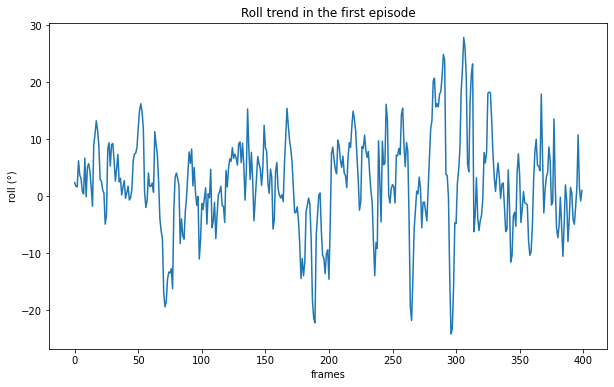

In [20]:
label0_df.iloc[0:400]["roll"].plot(figsize=(10, 6), ylabel="roll (°)", xlabel="frames", title="Roll trend in the first episode")

<AxesSubplot:title={'center':'Pitch and Roll trend in the first episode'}, xlabel='frames'>

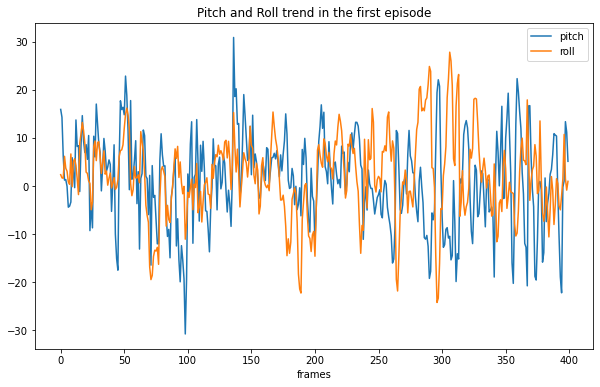

In [21]:
label0_df.iloc[0:400]["pitch"].plot(figsize=(10, 6), xlabel="frames", title="Pitch and Roll trend in the first episode", legend=True)
label0_df.iloc[0:400]["roll"].plot(figsize=(10, 6), legend=True)

### Scatter plot to find outliers

<AxesSubplot:xlabel='pitch (°)', ylabel='roll (°)'>

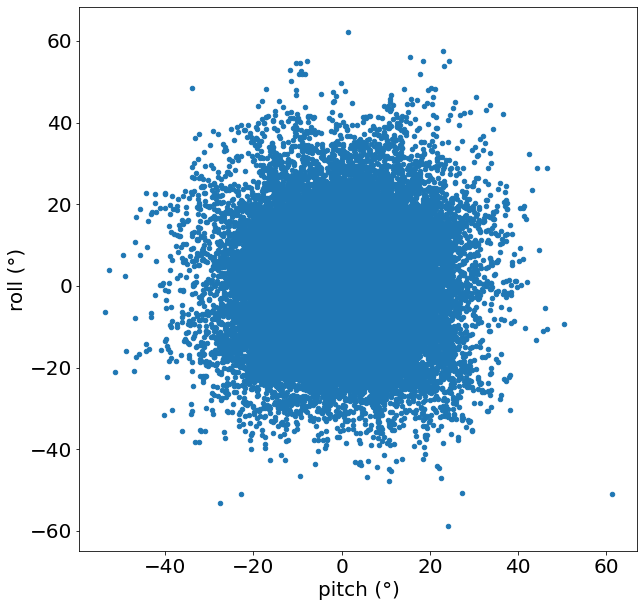

In [22]:
ax = label0_df.plot.scatter(0, 1, figsize=(10,10))
# Border of 99.7% interval
circle1 = plt.Rectangle((-20, -20), 40, 40, color='orange', fill=False, linewidth=5)
# ax.add_patch(circle1)
ax.set_xlabel("pitch (°)", fontsize=20)
ax.set_ylabel("roll (°)", fontsize=20)
ax.tick_params(labelsize=20)
ax.tick_params(labelsize=20)
ax

<AxesSubplot:>

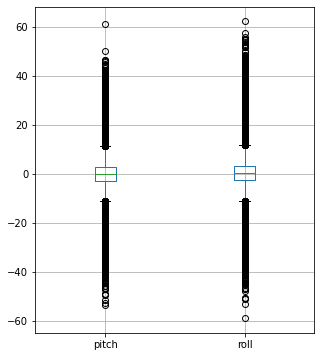

In [23]:
boxplot = label0_df.boxplot(column=["pitch","roll"], figsize=(5,6))
boxplot

## Live plot at 6Hz

In [24]:
pitch = round(label0_df.iloc[0:400]["pitch"], 2)
roll = round(label0_df.iloc[0:400]["roll"], 2)

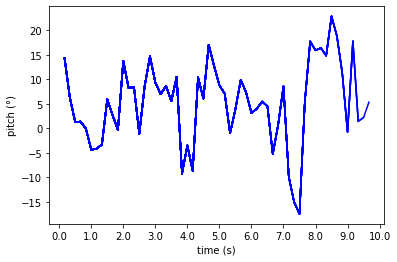

In [54]:
stop = 60
xticks = np.linspace(0, stop, 11)
xlables = [v/6 for v in xticks]

for i in range(stop):
    plt.plot(pitch[1:i], color = 'b')
    plt.ylabel("pitch (°)")
    plt.xlabel("time (s)")
    plt.xticks(xticks, labels=xlables)
    plt.savefig(f"../3dmodel/real_time_graphs/{i}")


In [26]:
import time
stop = 60
for p, r in zip(pitch[:stop], roll[:stop]):
    print(p, r)
    time.sleep(0.1667)

15.92 2.36
14.3 1.7
6.21 1.61
1.24 6.18
1.34 3.7
-0.07 3.08
-4.39 0.87
-4.18 0.36
-3.32 6.67
5.89 -0.14
2.65 5.05
-0.34 5.68
13.73 4.29
8.21 1.48
8.39 -1.78
-1.15 8.93
8.55 10.88
14.63 13.21
9.32 11.51
6.96 8.88
8.6 2.89
5.53 2.63
10.5 1.07
-9.26 0.53
-3.51 -4.94
-8.69 -3.35
10.35 8.15
6.05 9.36
17.03 5.28
12.72 9.05
8.75 9.21
7.04 6.22
-1.01 2.62
3.88 4.83
9.88 7.29
7.29 2.46
3.11 3.11
3.97 0.18
5.43 1.6
4.49 2.71
-5.27 -0.39
0.67 0.62
8.57 1.74
-9.94 -0.7
-15.09 -0.27
-17.48 1.25
5.41 6.14
17.71 7.38
15.89 7.51
16.36 8.55
14.8 12.0
22.84 14.93
18.83 16.19
11.35 14.73
-0.76 11.84
17.75 0.58
1.4 -2.01
2.18 -0.76
5.31 4.03
9.42 1.69
